## Encapsulation

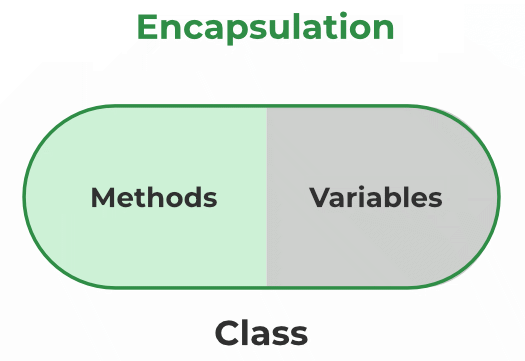

**Concept Overview**

> Encapsulation is the bundling of data (attributes) and methods (functions) that operate on the data into a singe unit -- a class -- and restricting direct access to some of the object's components.

> think of it as putting data in a protective capsule -- only controlled access is allowed.

**Interview-Worthy Explanation**

> Encapsulation in Python is the practice of restricting direct access to an object's data and methods. I achieve this by using private attributes (with double underscores) and providing public methods to interact with them, such as getters and setters. This ensures the object’s internal state is not accidentally or maliciously modified and promotes better data security and control.

**Why is Encapsulation Important?**

* Protects data from unintented or harmful changes
* helps maintain control over how data is modified
* Supports modular, maintainable and scalable code
* makes it easier to track bugs and manage behaviour

**Real-world Analogy**

Think of an ATM machine:

* You can withdraw or deposit money using buttons (methods).

* You can't directly access the bank's servers (data is hidden).

* The interface ensures that money handling is safe and controlled.

In [10]:
# Example

class BankAccount:
    def __init__(self, balance):
        self.__balance = balance # private attribute
        print(f"Balance: {self.__balance}")
    
    def deposit(self, amount):
        if amount > 0:
            self.__balance += amount
            print(f"deposited: {amount}")
            print(f"New balance: {self.__balance}")
    
    def withdraw(self, amount):
        if 0 < amount <= self.__balance:
            self.__balance -= amount
            print(f"Withdrawn: {amount}")
        else:
            print("Insufficient funds or invalid amount.")
    
    def get_balance(self):
        return f"Final Balance: {self.__balance}"
    
acc = BankAccount(1000)
acc.deposit(200)
acc.withdraw(70)
print(acc.get_balance())

Balance: 1000
deposited: 200
New balance: 1200
Withdrawn: 70
Final Balance: 1130


In [11]:
# Direct access fails
print(acc.__balance)

AttributeError: 'BankAccount' object has no attribute '__balance'

**Access Modifiers in Python**

 Unlike Java/C++, Python does not enforce strict access modifiers but follows naming conventions to simulate them:

| Modifier  | Syntax           | Access Level                   |
| --------- | ---------------- | ------------------------------ |
| Public    | `self.balance`   | Accessible everywhere          |
| Protected | `self._balance`  | Hint for internal use only     |
| Private   | `self.__balance` | Name mangling (hard to access) |


**Under the Hood: Name Mangling**

When you declare an attribute as `__balance`, Python changes its name internally to `_ClassName__balance`.

In [13]:
# example syntax
acc = BankAccount(1000)
print(acc._BankAccount__balance)  # Accessing private attribute (not recommended)

Balance: 1000
1000


# Getters and Setters

**Getters and Setters**

> sometimes you want controlled access to private attributes.

> getter and setter helps with that.

* *Getter:* A method that returns the value of a private attribute.
* *setter:* A method that  modifiers the value of a private attribute -- often with validation.

> They are used to control access to private attributes `__attributes` and ensure safe and controlled updates. 

In [19]:
# example 1

class Student:
    def __init__(self, name):
        self.__name = name
        
    def get_name(self):
        return self.__name
    
    def set_name(self,name):
        if isinstance(name, str):
            self.__name = name
            
s = Student("Sai")
print(s.get_name())
s.set_name("Kiran")
print(s.get_name())

Sai
Kiran


**Interview-Worthy Explanation**

> In Python, getters and setters are used to control access to an object’s private attributes. While I can define traditional getter and setter methods explicitly, the Pythonic way is to use the `@property` decorator, which allows me to access attributes like normal variables while still enforcing logic like validation behind the scenes.

**Why Use Getters and Setters?**

* To enforce rules or validation when setting values.
* To hide internal implementation and expose only safe methods.
* To make your class maintainable and future-proof.

**Real-world Analogy**

Imagine you’re setting the volume on a speaker:

* You can’t just open the speaker and change a chip (direct access).

* Instead, you use the volume knob (setter) — it may limit the max/min range.

* You can see the current volume (getter) through a display.

In [23]:
# example 2: using getter and setter
class Product:
    def __init__(self, price):
        self.__price = price
    
    # Getter method
    def get_price(self):
        return self.__price
    
    # Setter method with validation
    def set_price(self, new_price):
        if new_price > 0:
            self.__price = new_price
        else:
            print("Invalid price! Price must be positive.")

item = Product(100)
print(item.get_price())

item.set_price(20)
print(item.get_price())

item.set_price(150)
print(item.get_price())

item.set_price(-20)
print(item.get_price())


100
20
150
Invalid price! Price must be positive.
150


In [24]:
# example 3: using @Property Decorator
class Product:
    def __init__(self, price):
        self.__price = price
        
    @property
    def price(self):
        return self.__price
    
    @price.setter
    def price(self, value):
        if value > 0:
            self.__price = value
        else:
            print("Invaild Price!")
            
item = Product(100)
print(item.price)     # calls getter

item.price = 200      # calls setter
print(item.price)     # 200

item.price = -50      # Invalid price!
print(item.price)     # 200

100
200
Invaild Price!
200
